In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

In [4]:
import seaborn as sns

In [5]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

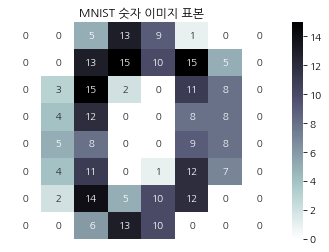

In [8]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.heatmap(digits.images[0], cmap=mpl.cm.bone_r, annot=True, fmt="2.0f",
            cbar=True, xticklabels=False, yticklabels=False)
plt.title("MNIST 숫자 이미지 표본")
plt.show()

In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digits.images[0].flatten()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()
print("입력:\n", news.data[0])
print("출력:\n", news.target_names[news.target[0]])

입력:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





출력:
 rec.autos


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words="english").fit(news.data[:100])
data = vec.transform(news.data[:100])
data.shape

(100, 6288)

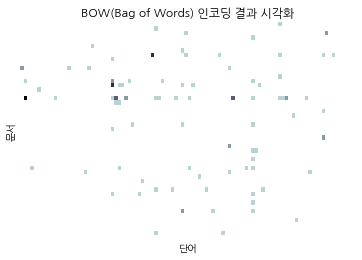

In [16]:
sns.heatmap(data.toarray()[:50, :100], cmap=mpl.cm.bone_r,
            linewidths=0.001, linecolor='gray', cbar=False,
            xticklabels=False, yticklabels=False)
plt.xlabel("단어")
plt.ylabel("문서")
plt.title("BOW(Bag of Words) 인코딩 결과 시각화")
plt.show()

C:\Users\82107\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

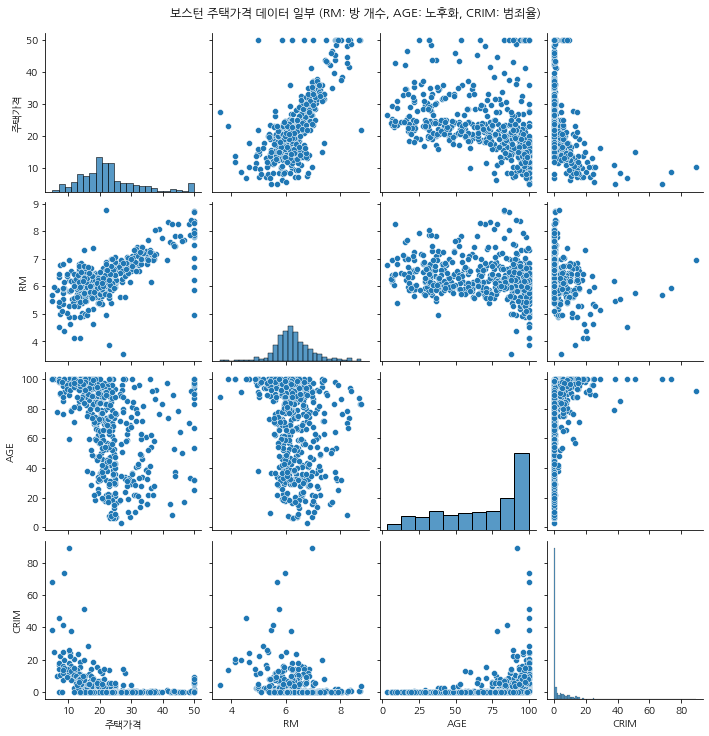

In [17]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["주택가격"] = boston.target
g = sns.pairplot(df[["주택가격", "RM", "AGE", "CRIM"]])
g.fig.suptitle("보스턴 주택가격 데이터 일부 (RM: 방 개수, AGE: 노후화, CRIM: 범죄율)", y=1.02)
plt.show()

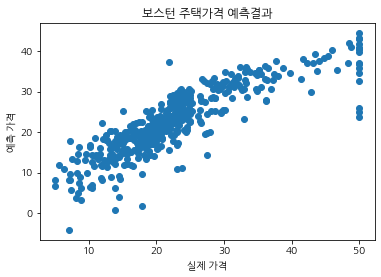

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.scatter(boston.target, predicted)
plt.xlabel("실제 가격")
plt.ylabel("예측 가격")
plt.title("보스턴 주택가격 예측결과")
plt.show()

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

np.random.seed(0)
df.sample(frac=1).reset_index(drop=True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


In [35]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

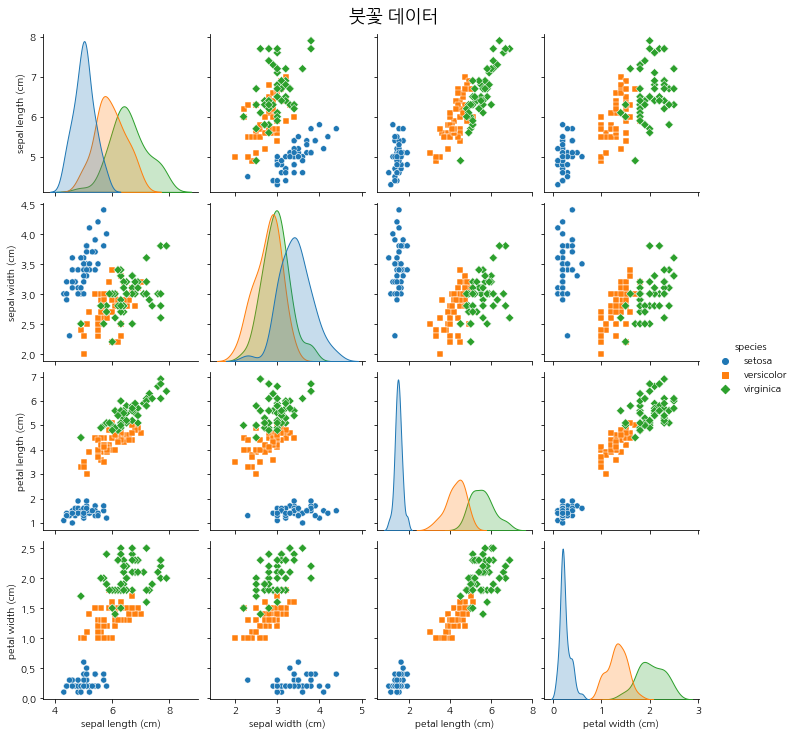

In [28]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("붓꽃 데이터", y=1.02, fontsize=18)
plt.show()


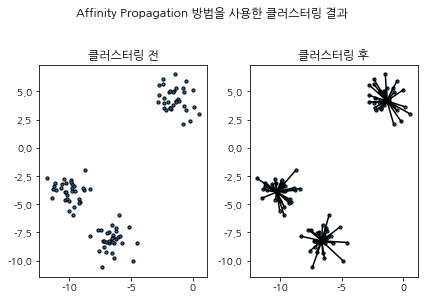

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

X, _ = make_blobs(n_features=2, centers=3, random_state=1)
model = AffinityPropagation().fit(X)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor="k")
plt.title("클러스터링 전")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor="k")
plt.title("클러스터링 후")
for k in range(3):
    cluster_center = X[model.cluster_centers_indices_[k]]
    for x in X[model.labels_ == k]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], c="k")
        
plt.suptitle("Affinity Propagation 방법을 사용한 클러스터링 결과", y=1.03)
plt.tight_layout()
plt.show()